# <span style="color:green"> ESERCITAZIONE 12 </span>

### <span style="color:blue">  Esercizio 12.3 </span> 
<span style="color:blue"> Usa l'applicazione Gimp per disegnare a mano $10$ cifre, con il mouse o con il touchpad, importale su questo jupyter-notebook e verifica che la rete neurale convoluzionale dell'esercizio precedente sia capace di riconoscere queste $10$ cifre scritte a mano da te. </span> 

### Consigli sull'uso di GIMP

Prima di poter procedere con il riconoscimento delle cifre, le immagini devono essere prodotte e salvate nella maniera corretta, in modo che la rete neurale sia capace di interpretarle. Ecco i passaggi da seguire usando l'editor di immagini GIMP.

1. **Disegna l'immagine**.

Una volta aperto GIMP e aver cliccato sulla barra in alto *file* e dopo su *nuova*, GIMP ti chiede le dimensioni dell'immagine. L'unità di misura impostata è in pixel, quella che vogliamo. All'inizio scegli un **formato grande**, del tipo $400\times 400$, in modo da aver una tela abbastanza grande per disegnare. E' di fondamentale importanza  impostare la **tela** in modo che sia **un quadrato**! Questo perché quando dovrai riscalare l'immagine ad un quadratino $28\times 28$ pixel, GIMP mantiene le proporzioni iniziali. Non è possibile riscalare un solo lato: GIMP li riscala entrambi mantendendo le proporzioni iniziali dell'immagine. 

2. **Inverti i colori**.

La tela offerta da GIMP è bianca ed è corretto disegnare la cifra con il pennello nero. La nostra rete neurale però riconosce le immagini **bianche su sfondo nero**. Quindi una volta disegnata l'immagine, vai sulla barra in alto, clicca su *colori*, clicca su *inverti*. Ora hai una cifra bianca su sfondo nero. 

3. **Scala l'immagine**.

Hai disegnato l'immagine su una tela di dimensioni $n\times n$, con $n=400, 500$... Poiché la nostra rete neurale riconosce **cifre di dimensioni** $28\times 28$ pixel, l'immagine va **riscalata**. Vai sulla barra in alto, clicca su *immagine*, cliccca su *scala immagine*. Si apre una tabella che dice *dimensione immagine*. A noi interessano le prime due righe, *larghezza* e *altezza* e appaiono le dimensioni iniziali della tela. Cancella i valori che ci sono e scrivi **28** in entrambe le righe. A dire il vero, basta scriverlo solo da una parte perché, essendo mantenute le proporzioni iniziali, se la tela iniziale è un quadrato, GIMP mette in automatico il secondo valore uguale al primo e non si può fare altrimenti. Come unità di misura lascia **px**, ossia pixel e salva. Si ottiene un'immagine piccolissima.

4. **Esporta come png**.

A questo punto puoi salvare l'immagine. Vai sulla barra in alto e clicca su *file*. Verrebbe spontaneo cliccare sulle voci salva oppure salva come. Se selezioni una di queste opzioni, GIMP imposta come formato dell'immagine .xcf, che non solo presenta dei problemi in fase di apertura, ma non è proprio riconosciuto dalla rete neurale, che vuole **come estensione il formato .png**. Se rinomini l'estensione da .xcf a .png, GIMP ti dice che questa operazione è impossibile e ti suggerisce l'opzione esporta come. Allora ricominciamo. Vai sulla barra in alto, clicca su *file*, clicca su *esporta come*. A questo punto puoi chiamare il file *nomefile.png*, ad esempio 1.png, e poi clicca su *esporta*. Dopo ti appare una tabella con delle preferenze, alcune già scelte da GIMP: mantienile ed esporta.

Svolgi questo procedimento per tutte le cifre da $0$ a $9$. Ora hai le immagini per testare la rete neurale con le cifre scritte a mano da te!

### Rete neurale convoluzionale

Riporto integralmente la rete neurale scritta per l'esercizio precedente, aggiungendo uno specchietto per poter caricare le $10$ cifre scritte a mano da me.

In [1]:
#Richiamo le librerie.
import tensorflow as tf
from tensorflow import keras
import os
import numpy as np
import matplotlib.pyplot as plt

seed=0
np.random.seed(seed) # fix random seed
tf.random.set_seed(seed)

2024-06-24 15:49:01.165189: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
#Step 1. Carico il dataset dal mnist.
from keras.datasets import mnist

# input image dimensions
img_rows, img_cols = 28, 28 # number of pixels 
# output
num_classes = 10 # 10 digits

# the data, split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# print train and test data shape
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print('X_test shape:', X_test.shape)
print('Y_test shape:', Y_test.shape)

X_train shape: (60000, 28, 28)
Y_train shape: (60000,)
X_test shape: (10000, 28, 28)
Y_test shape: (10000,)


In [3]:
# reshape data, depending on Keras backend
if keras.backend.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)


In [4]:
print('Prima di to categorical:')
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

Prima di to categorical:
X_train shape: (60000, 28, 28, 1)
Y_train shape: (60000,)

60000 train samples
10000 test samples


In [5]:
# cast to floats
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# rescale data in interval [0,1]
X_train /= 255
X_test /= 255

# convert class vectors to binary class matrices, e.g. for use with categorical_crossentropy
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)

In [6]:
print('Dopo di to categorical:')
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

Dopo di to categorical:
X_train shape: (60000, 28, 28, 1)
Y_train shape: (60000, 10)

60000 train samples
10000 test samples


In [7]:
#Step 2. Definisco la rete neurale.
from keras.models import Sequential
from keras.layers import Dense, Dropout
# you will need the following for Convolutional Neural Networks
from keras.layers import Flatten, Conv2D, MaxPooling2D

In [8]:
def create_CDNN():
    #Inizializza il modello.
    model = Sequential() 
    #Definisco la rete neurale convoluzionale 2D. Il primo layer ha 10 filtri.
    #Trattandosi del primo layer, devo dire qual è la funzione di attivazione e la forma dei dati di input.
    model.add(Conv2D(10, kernel_size=(5,5), activation='relu', input_shape=input_shape))   
    #Aggiungo un secondo layer convoluzionale con 90 filtri.
    model.add(Conv2D(90, kernel_size=(5,5), activation='relu'))   
    #Agguingo la funzione Dropout: durante la fase di training si spengono a caso e a turno
    #la metà dei neuroni (0.5), in modo da complicare l'apprendimento. Il modello sarà robusto.
    model.add(Dropout(0.5))
    #Dico che il modo di sintetizzare l'informazione sui filtri è il max pooling.
    model.add(MaxPooling2D(pool_size=(2,2)))
    #Rendo l'informazione di input da 2D a 1D.
    model.add(Flatten())
    #Aggiungo un layer di 25 neuroni.
    model.add(Dense(25, activation='relu'))
    #Aggiungo l'ultimo layer di neuroni, con funzione di attivazione softmax, per le probabilità.
    model.add(Dense(num_classes, activation='softmax'))
    
    return model

print('Model architecture created successfully!')

Model architecture created successfully!


In [9]:
#Step 3. Scelgo l'ottimizzatore e la funzione costo e compilo il modello.
from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Adamax, Nadam

def compile_model():
    # create the model
    model=create_CDNN()
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=SGD(),
                  metrics=['acc'])
    return model

print('Model compiled successfully and ready to be trained.')

Model compiled successfully and ready to be trained.


In [10]:
#Step 4. Alleno il modello.
#Attenzione: il training di un'epoca dura circa due minuti.
#Per questo scelgo di eseguirlo solo per 10 epoche. 
#Ho provato con 2 epoche e l'accuratezza era del 97%.
#Andava già bene, quindi adesso può fare meglio.

# training parameters
batch_size = 32
epochs = 10

# create the deep neural net
model_CDNN = compile_model()

# train DNN and store training info in history
history = model_CDNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

2024-06-24 15:50:22.645644: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-24 15:50:22.681181: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Epoch 1/10
1875/1875 [==============================] - 105s 56ms/step - loss: 0.3315 - acc: 0.9019 - val_loss: 0.1733 - val_acc: 0.9668
Epoch 2/10
1875/1875 [==============================] - 98s 52ms/step - loss: 0.1020 - acc: 0.9696 - val_loss: 0.1017 - val_acc: 0.9779
Epoch 3/10
1875/1875 [==============================] - 102s 54ms/step - loss: 0.0739 - acc: 0.9776 - val_loss: 0.0800 - val_acc: 0.9820
Epoch 4/10
1875/1875 [==============================] - 99s 53ms/step - loss: 0.0603 - acc: 0.9816 - val_loss: 0.0739 - val_acc: 0.9821
Epoch 5/10
1875/1875 [==============================] - 126s 67ms/step - loss: 0.0519 - acc: 0.9841 - val_loss: 0.0640 - val_acc: 0.9848
Epoch 6/10
1875/1875 [==============================] - 117s 63ms/step - loss: 0.0453 - acc: 0.9860 - val_loss: 0.0563 - val_acc: 0.9871
Epoch 7/10
1875/1875 [==============================] - 98s 52ms/step - loss: 0.0394 - acc: 0.9882 - val_loss: 0.0500 - val_acc: 0.9885
Epoch 8/10
1875/1875 [======================

313/313 [==============================] - 5s 17ms/step - loss: 0.0417 - acc: 0.9880

Test loss: 0.04166484996676445
Test accuracy: 0.9879999756813049


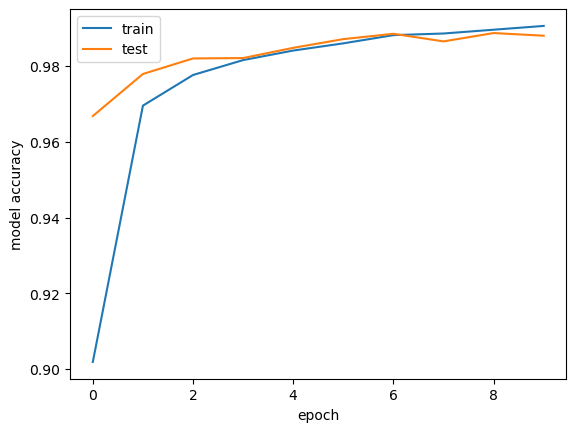

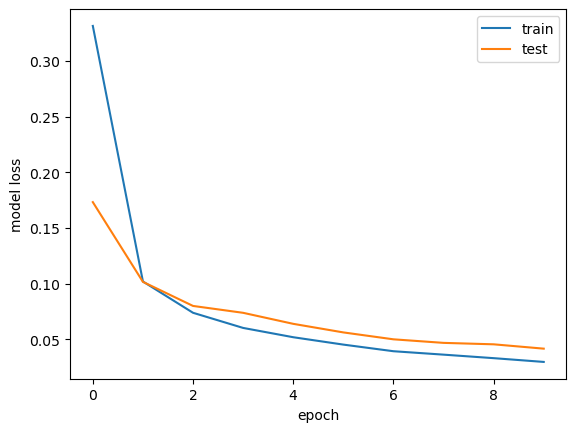

In [11]:
#Step 5. Valuto le performance del modello.
# evaluate model
score = model_CDNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

### Specchietto per caricare tutte le cifre

In [12]:
from PIL import Image
import os

#digit_filename = "cifre/1.png"
#Carico nel vettore digit_filename tutte le cifre.
digit_filename = [ "cifre/0.png", "cifre/1.png", "cifre/2.png", 
                   "cifre/3.png", "cifre/4.png", "cifre/5.png",
                   "cifre/6.png", "cifre/7.png", "cifre/8.png",
                   "cifre/9.png" ] 

img = [] #Vettore con le immagini con formato modificato, 
         #adatto al riconoscimento, a partire da digit_filename.

#Per ciascuno degli elementi in digit_filename, applico il processo di modifica del formato.
for digit in digit_filename:
    digit_in = Image.open(digit).convert('L')

    ydim, xdim = digit_in.size
    print("Image size: "+str(xdim)+"x"+str(ydim))
    
    pix=digit_in.load();
    data = np.zeros((xdim, ydim))
    
    for j in range(ydim):
        for i in range(xdim):
            data[i,j]=pix[j,i]/255
    img.append(data)


Image size: 28x28
Image size: 28x28
Image size: 28x28
Image size: 28x28
Image size: 28x28
Image size: 28x28
Image size: 28x28
Image size: 28x28
Image size: 28x28
Image size: 28x28


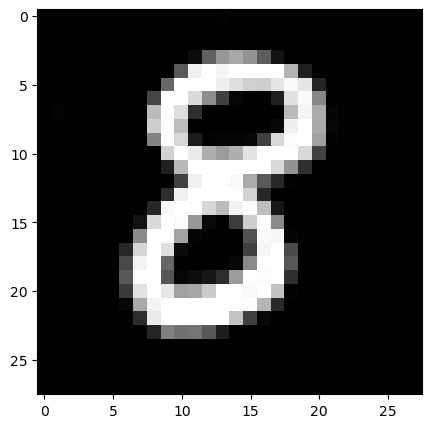

(28, 28)


In [13]:
#Mostro ad esempio la figura numero 8.
#print(data.shape)
plt.figure(figsize=(5,5))
plt.imshow(img[8], cmap='gray')
plt.show()
print(img[8].shape)

In [14]:
#Step 6. Ora che il modello è pronto, genero nuovi punti applicandolo.
#Le X sono le cifre scritte a mano da me, le Y sono le etichette che la rete dovrà indovinare.
#Vettore con le predizioni.
#Prima lo inizializzo con tutti 0, poi inserisco le predizioni del modello. 
predictions = [0,0,0,0,0,0,0,0,0,0]

for i in range(0,10):
    img[i] = img[i].reshape(1, xdim, ydim, 1)
    predictions[i] = model_CDNN.predict(img[i])
    img[i] = img[i].reshape(xdim,ydim)


1/1 [==============================] - 0s 20ms/step


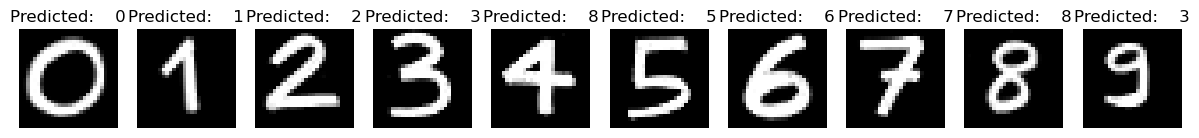

In [18]:
#Faccio il grafico delle cifre.
plt.figure(figsize=(15, 5))

for i in range(10):    
    ax = plt.subplot(1, 10, i + 1)    
    plt.imshow(img[i], cmap='gray')    
    #plt.title("Digit: {}\nPredicted:    {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i]))) 
    plt.title("Predicted:    {}".format(np.argmax(predictions[i])))    
    plt.axis('off') 

plt.show()

### Osservazioni

Ho usato lo stesso modello dell'esercizio precedente, riaddestrando la rete neurale. Le performance e l'accuratezza sono le stesse. La volta scorsa la rete ha riconosciuto tutte le $20$ cifre proposte, mentre in questo caso ne ha sbagiate due. Ha preso il $4$ per un $8$, forse perché l'ho scritto con la barra centrale tutta intera e quindi assomiglia a un $8$. Ha preso il $9$ per un $3$, forse perché un po' ci assomiglia. Complessivamente, la rete neurale riconosce bene le cifre.